In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("emails.txt")

In [3]:
data

,Unnamed: 0,filename,Message-ID,content,Class
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...,...,...,...
48071,48071,campbell-l/notes_inbox/133.,<6503484.1075857876489.JavaMail.evans@thyme>,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,48072,campbell-l/notes_inbox/134.,<17277180.1075857876513.JavaMail.evans@thyme>,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,48073,campbell-l/notes_inbox/135.,<31066400.1075857876537.JavaMail.evans@thyme>,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,48074,campbell-l/notes_inbox/136.,<26024436.1075857876659.JavaMail.evans@thyme>,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


In [4]:
data.shape

(48076, 5)

## Data Cleaning

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48076 entries, 0 to 48075
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  48076 non-null  int64 
 1   filename    48076 non-null  object
 2   Message-ID  48076 non-null  object
 3   content     48076 non-null  object
 4   Class       48076 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


In [6]:
data.drop(columns=['Unnamed: 0','filename','Message-ID'],inplace=True)

In [7]:
data.sample(5)

,content,Class
39031,"Terry, let's discuss. Thanks. Lynn\n---------...",Non Abusive
13277,Attached is an announcement about The Periwink...,Non Abusive
37507,"Lynn, per your request price for conference mt...",Non Abusive
7460,yea they were doing spoofs on the rules of bus...,Non Abusive
2479,\nfyi.\n -----Original Message-----\nFrom: \tC...,Abusive


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [9]:
data['Class']=encoder.fit_transform(data['Class'])

In [10]:
data.head()

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0
1,fuck you,0
2,Gentlemen:\nThe following champagne is availab...,0
3,sorry i've taken so long...just been trying to...,0
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0


In [11]:
data.isnull().sum()

content    0
Class      0
dtype: int64

In [12]:
data.duplicated().sum()

23420

In [13]:
data['Class'].value_counts()

Class
1    44666
0     3410
Name: count, dtype: int64

In [14]:
import matplotlib.pyplot as plt

### 0: abusive
### 1: non-abusive

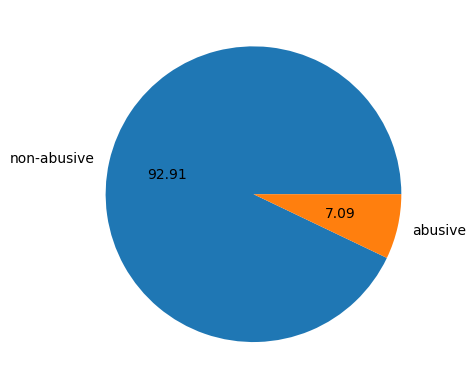

In [15]:
plt.pie(data['Class'].value_counts(),labels=['non-abusive','abusive'],autopct="%0.2f")
plt.show()

#### data is imbalanced

In [16]:
import nltk


In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rushi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
data['num_character']=data['content'].apply(len)

In [19]:
data['content'].apply(lambda x:nltk.word_tokenize(x))

0        [eat, shit, John, J, Lavorato, @, excelr, 11/1...
1                                              [fuck, you]
2        [Gentlemen, :, The, following, champagne, is, ...
3        [sorry, i, 've, taken, so, long, ..., just, be...
4        [asshole, John, J, Lavorato, @, excelr, 12/23/...
                               ...                        
48071    [Dear, Market, Participants, ,, Please, note, ...
48072    [According, to, my, fancy, ciphering, we, made...
48073    [BUSINESS, HIGHLIGHTS, Weather, Group, Let=01,...
48074    [Welcome, to, :, DIAMONDS, NEWSLETTER, Issue, ...
48075    [--, --, --, --, --, --, --, --, --, --, --, F...
Name: content, Length: 48076, dtype: object

In [20]:
data['num_words']=data['content'].apply(lambda x:len(nltk.word_tokenize(x)))

In [21]:
data['num_sent']=data['content'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [22]:
data.head()

,content,Class,num_character,num_words,num_sent
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,44,1
1,fuck you,0,8,2,1
2,Gentlemen:\nThe following champagne is availab...,0,612,99,6
3,sorry i've taken so long...just been trying to...,0,505,163,9
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,42,2


In [23]:
data[['num_character','num_words','num_sent']].describe()

,num_character,num_words,num_sent
count,48076.000000,48076.000000,48076.00000
mean,1665.668088,317.526874,12.37786
std,4478.977510,706.673194,25.96107
min,1.000000,1.000000,1.00000
25%,264.000000,52.000000,3.00000
50%,725.500000,140.000000,6.00000
75%,1720.000000,335.000000,13.00000
max,272036.000000,32337.000000,1088.00000


#### for abusive emails

In [24]:
data[data['Class']==0][['num_character','num_words','num_sent']].describe()

,num_character,num_words,num_sent
count,3410.000000,3410.000000,3410.000000
mean,1709.079765,351.747801,18.199120
std,2874.279894,601.943372,37.187441
min,5.000000,1.000000,1.000000
25%,176.250000,39.000000,3.000000
50%,591.500000,123.000000,6.000000
75%,2121.000000,435.000000,18.000000
max,35528.000000,7112.000000,451.000000


#### for non-abusive emails

In [25]:
data[data['Class']==1][['num_character','num_words','num_sent']].describe()

,num_character,num_words,num_sent
count,44666.000000,44666.000000,44666.000000
mean,1662.353849,314.914297,11.933439
std,4578.442450,713.976337,24.841487
min,1.000000,1.000000,1.000000
25%,274.000000,53.000000,3.000000
50%,735.000000,142.000000,6.000000
75%,1699.000000,329.000000,12.000000
max,272036.000000,32337.000000,1088.000000


In [26]:
import seaborn as sns

C:\Users\rushi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rushi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rushi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rushi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

<Axes: xlabel='num_character', ylabel='Count'>

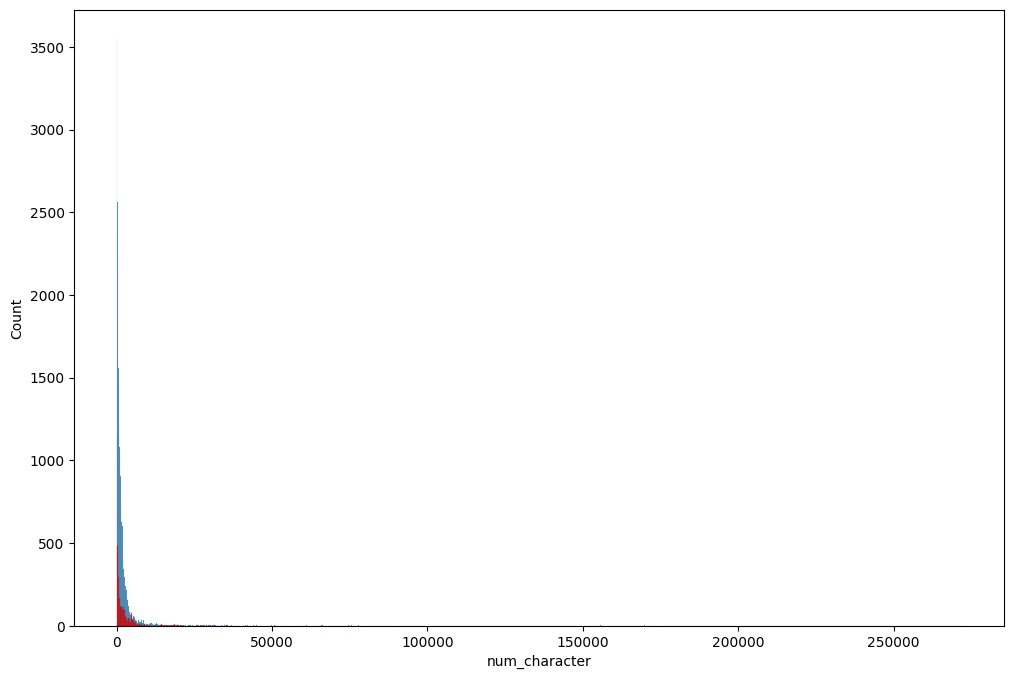

In [27]:
plt.figure(figsize=(12,8))
sns.histplot(data[data['Class']==1]['num_character'])
sns.histplot(data[data['Class']==0]['num_character'],color='red')

C:\Users\rushi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rushi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rushi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rushi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

<Axes: xlabel='num_words', ylabel='Count'>

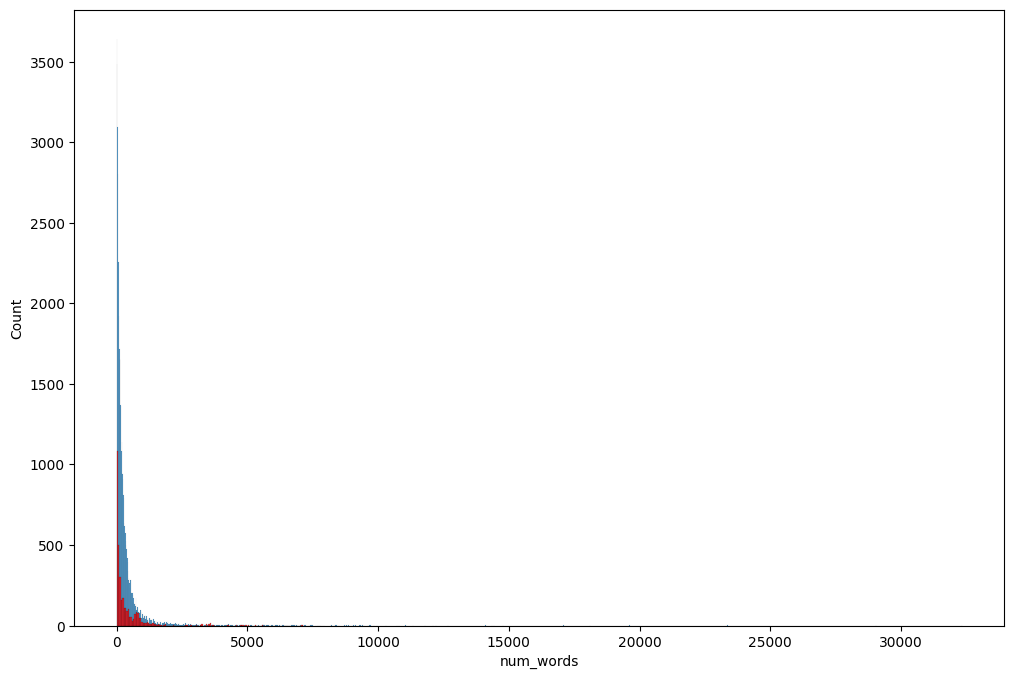

In [28]:
plt.figure(figsize=(12,8))
sns.histplot(data[data['Class']==1]['num_words'])
sns.histplot(data[data['Class']==0]['num_words'],color='red')

C:\Users\rushi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rushi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rushi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rushi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

<Axes: xlabel='num_sent', ylabel='Count'>

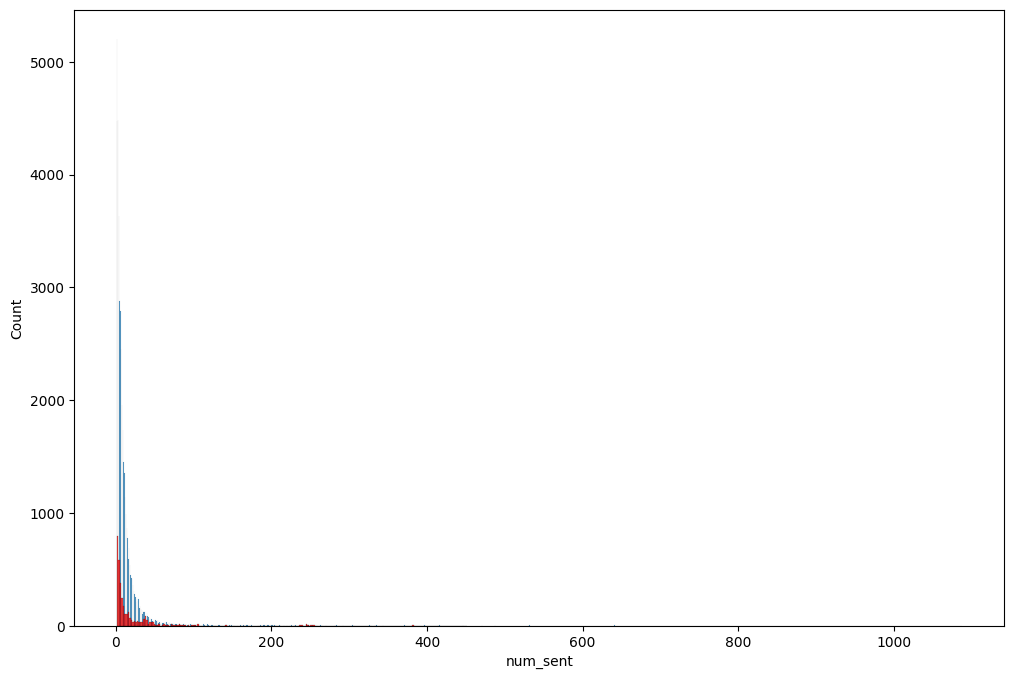

In [29]:
plt.figure(figsize=(12,8))
sns.histplot(data[data['Class']==1]['num_sent'])
sns.histplot(data[data['Class']==0]['num_sent'],color='red')

## Data Preprocessing

1. convert to Lower case
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuation
5. Stemming

In [30]:
from nltk.corpus import stopwords
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [31]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [32]:
def transform_text(content):
    content = content.lower()
    content = nltk.word_tokenize(content)
    
    y = []
    for i in content:
        if i.isalnum():
            y.append(i)
    
    content = y[:]
    y.clear()
    
    for i in content:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    content = y[:]
    y.clear()
    
    for i in content:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [33]:
transform_text("I loved your dancing even i will be Learning it soon @HOME")

'love danc even learn soon home'

In [34]:
data['transformed_text']=data['content'].apply(transform_text)

In [35]:
data.head()

,content,Class,num_character,num_words,num_sent,transformed_text
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,44,1,eat shit john j lavorato excelr pm john ect cc...
1,fuck you,0,8,2,1,fuck
2,Gentlemen:\nThe following champagne is availab...,0,612,99,6,gentlemen follow champagn avail 70 approxim re...
3,sorry i've taken so long...just been trying to...,0,505,163,9,sorri taken long tri fend chick life sooooo ha...
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,42,2,asshol john j lavorato excelr john ect cc subj...


In [36]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [37]:
n_abusive_wc = wc.generate(data[data['Class'] == 1]['transformed_text'].str.cat(sep=" "))

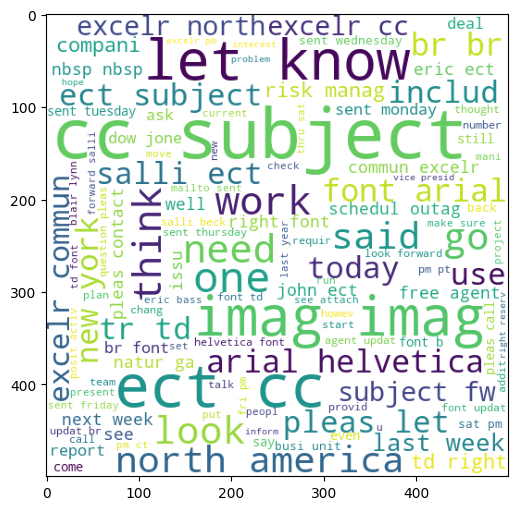

In [38]:
plt.figure(figsize=(15,6))
plt.imshow(n_abusive_wc)

In [39]:
abusive_wc = wc.generate(data[data['Class'] == 0]['transformed_text'].str.cat(sep=" "))

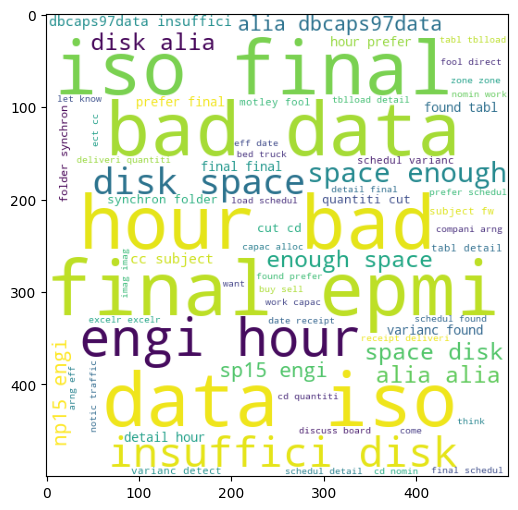

In [40]:
plt.figure(figsize=(15,6))
plt.imshow(abusive_wc)